<a href="https://colab.research.google.com/github/fibleep/sludge-water-plant/blob/main/water_plants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Waste Management in a Water Purification Plant
Client X has two input streams with used water that they clean using two large tanks. These tanks are filled
with living bacteria that eat the contaminants in the water, i.e. cleaning it. The bacteria will be less active
or even die if they get too much or too little food (contaminants), too much or too little oxygen, or if the
correct pH is not maintained. If this happens the sludge concentration at the exit of the tanks, i.e. our
target variable, will be to high and additional expensive cleaning steps need to be performed. It is your job
to forecast this sludge concentration 4h in advance.

## Our Variables

|Name    |Description                         |Units|
|--------|------------------------------------|-----|
|InputC1 |O2 percentage in tank 1             |%    |
|InputC2 |Liquid to reduce the pH in tank 1   |l/h  |
|InputC3 |Filtered sludge going back to tank 1|m3/h |
|InputC4 |Outside air                         |Nm3/h|
|InputC5 |Height in tank 1                    |m    |
|InputC6 |Flowrate to pH measurement in tank 1|l/h  |
|InputC7 |pH of liquid in tank 1              |pH   |
|InputC8 |Flowrate to O2 measurement in tank 1|l/h  |
|InputC9 |O2 dissolved in tank 1              |mg/l |
|InputC10|Temperature of liquid in tank 1     |°C   |
|        |                                    |     |
|InputE1 |Consentration of sludge             |g/l  |
|InputE2 |Conductivity                        |mS   |
|InputE3 |NO3 dissolved                       |mg/l |
|        |                                    |     |
|InputD1 |O2 percentage in tank 2             |%    |
|InputD2 |Liquid to reduce the pH in tank 2   |l/h  |
|InputD3 |Filtered sludge going back to tank 2|m3/h |
|InputD4 |Outside air                         |Nm3/h|
|InputD5 |Height in tank 2                    |m    |
|InputD6 |Flowrate to pH measurement in tank 1|l/h  |
|InputD7 |pH of liquid in tank 2              |pH   |
|InputD8 |Flowrate to O2 measurement in tank 2|l/h  |
|InputD9 |O2 dissolved in tank 2              |mg/l |
|InputD10|Temperature of liquid in tank 2     |°C   |
|        |                                    |     |
|InputA1 |Temperature                         |°C   |
|InputA2 |Flowrate                            |m3/h |
|InputA3 |Amount of sludge in water           |mg/l |
|InputA4 |Conductivity                        |mS/cm|
|InputA5 |                                    |kg/h |
|InputA6 |pH                                  |pH   |
|        |                                    |     |
|InputB1 |Temperature                         |°C   |
|InputB2 |Flowrate                            |m3/h |
|InputB3 |Amount of sludge in water           |mg/l |
|InputB4 |Conductivity                        |mS/cm|
|InputB5 |                                    |kg/h |
|InputB6 |pH                                  |pH   |
|        |                                    |     |
|Target  |Target variable                     |mg/L |


# EDA

## Loading in data and installing necessary packages

In [49]:
!git clone https://github.com/fibleep/sludge-water-plant.git
!pip install pandas numpy seaborn matplotlib xgboost

fatal: destination path 'sludge-water-plant' already exists and is not an empty directory.


In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


df = pd.read_csv("/content/sludge-water-plant/dataset/dataset.csv",index_col=[0])
df.index = pd.to_datetime(df.index)
df.head()

,InputC1,InputC2,InputC3,InputC4,InputC5,InputC6,InputC7,InputC8,InputC9,InputC10,...,InputA4,InputA5,InputA6,InputB1,InputB2,InputB3,InputB4,InputB5,InputB6,Target
2022-01-01 00:00:00,18.49650,18.81396,100.0696,618.6791,NaN,1931.360,7.272931,1878.295,1.549485,27.25480,...,60.10090,7.385031,7.081979,27.39823,20.89696,260.1674,2.193955,NaN,6.236635,NaN
2022-01-01 00:05:00,18.49731,18.70401,100.0715,613.7349,NaN,1929.365,7.273591,1878.252,1.552745,27.25177,...,60.09105,7.375766,7.136544,27.07825,26.92165,259.9575,2.187813,NaN,6.238485,NaN
2022-01-01 00:10:00,18.49693,18.59405,100.0733,608.7906,NaN,1924.322,7.274251,1878.209,1.556006,27.24874,...,60.08120,7.366502,7.085941,26.75828,14.01370,259.7475,2.181671,NaN,6.240336,NaN
2022-01-01 00:15:00,18.49603,18.48410,100.0751,603.8464,NaN,1919.279,7.274910,1878.167,1.559266,27.24572,...,60.07135,7.357237,6.743883,26.50328,5.78938,259.5375,2.175529,NaN,6.242187,NaN
2022-01-01 00:20:00,18.49512,18.37415,100.0770,598.9022,NaN,1914.235,7.275570,1878.124,1.562526,27.24269,...,60.06150,7.347972,6.621848,26.29828,39.27962,259.3275,2.169388,NaN,6.244037,NaN


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76474 entries, 2022-01-01 00:00:00 to 2022-09-23 13:45:00
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   InputC1   71948 non-null  float64
 1   InputC2   70943 non-null  float64
 2   InputC3   71116 non-null  float64
 3   InputC4   76396 non-null  float64
 4   InputC5   67461 non-null  float64
 5   InputC6   70914 non-null  float64
 6   InputC7   70852 non-null  float64
 7   InputC8   70828 non-null  float64
 8   InputC9   70880 non-null  float64
 9   InputC10  70802 non-null  float64
 10  InputE1   70871 non-null  float64
 11  InputE2   74587 non-null  float64
 12  InputE3   33120 non-null  float64
 13  InputD1   71923 non-null  float64
 14  InputD2   71190 non-null  float64
 15  InputD3   71138 non-null  float64
 16  InputD4   76398 non-null  float64
 17  InputD5   66353 non-null  float64
 18  InputD6   70881 non-null  float64
 19  InputD7   71128 non-null  float6

Looks like the data is collected every 5 minutes, NaN values are present, the target column can be NaN as well

In [52]:
missing_values = df.isnull().sum() / len(df)
missing_values.sort_values(ascending=False).head(5)

InputE3    0.566912
InputB5    0.435547
InputA2    0.332427
InputD5    0.132346
InputA4    0.125847
dtype: float64

The ratio of nulls, it looks like E3, B5, A2 are null the most often

E3 -> NO3 dissolved

B5 -> Not Specified

A2 -> Flow rate


What can we deduce from this?

Some bacteria need nitrogen, I assume that's why NO3 is sometimes null and sometimes not.

B5 is not specified


In [53]:
df['Target'] = df['Target'].shift(-48) # Shift by 4 hours

In [54]:
df['Target'].describe()

count    70286.000000
mean        51.028149
std         44.037615
min         -0.011699
25%         21.311235
50%         33.956840
75%         62.185650
max        203.460900
Name: Target, dtype: float64

This is sludge, in mg/L. The negative value is probably a mistake of the readings.

It looks like there's quite a bit of variation, there are some really high outliers but generally it should be around 30-40 mg/L

In [55]:
corr = df.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
corr = corr.unstack().transpose().sort_values(ascending=False).dropna()
corr[:20]

InputD10  InputC10    0.997912
InputD4   InputC4     0.985786
InputD1   InputC1     0.973743
InputA5   InputA3     0.860394
          InputC4     0.802451
InputB5   InputB3     0.800484
InputA5   InputD4     0.793131
InputD7   InputC7     0.772154
Target    InputD5     0.764422
InputD5   InputC5     0.742540
InputA3   InputC4     0.711730
InputD9   InputC9     0.700897
InputA3   InputD4     0.693287
InputC4   InputC2     0.572892
InputD4   InputC2     0.571811
InputA5   InputE1     0.569396
Target    InputC5     0.565026
InputA3   InputE1     0.561188
InputD4   InputE1     0.549919
InputE1   InputC4     0.536829
dtype: float64

The most correlated and interesting features are:

- D10 - C10 - Temperatures in both tanks
- D4 - C4 - Outside air
- D1 - C1 - 02 Percentage in Tanks
- A5 - A3 - ???? / Amount of sludge in water
   - This seems like a very important correlation, shame there's no description for A5, need to keep this in mind
- A5 - D4 - ???? / Outside air
  - Another correlation with the missing feature
- Target/D5 Height of the 2nd tank
  - The 2nd tank is more correlated with the target than the first tank
- A3 / C4 & D4 - Amount of sludge / Air outside

array([[<Axes: title={'center': 'InputC1'}>,
        <Axes: title={'center': 'InputC2'}>,
        <Axes: title={'center': 'InputC3'}>,
        <Axes: title={'center': 'InputC4'}>,
        <Axes: title={'center': 'InputC5'}>,
        <Axes: title={'center': 'InputC6'}>],
       [<Axes: title={'center': 'InputC7'}>,
        <Axes: title={'center': 'InputC8'}>,
        <Axes: title={'center': 'InputC9'}>,
        <Axes: title={'center': 'InputC10'}>,
        <Axes: title={'center': 'InputE1'}>,
        <Axes: title={'center': 'InputE2'}>],
       [<Axes: title={'center': 'InputE3'}>,
        <Axes: title={'center': 'InputD1'}>,
        <Axes: title={'center': 'InputD2'}>,
        <Axes: title={'center': 'InputD3'}>,
        <Axes: title={'center': 'InputD4'}>,
        <Axes: title={'center': 'InputD5'}>],
       [<Axes: title={'center': 'InputD6'}>,
        <Axes: title={'center': 'InputD7'}>,
        <Axes: title={'center': 'InputD8'}>,
        <Axes: title={'center': 'InputD9'}>,
      

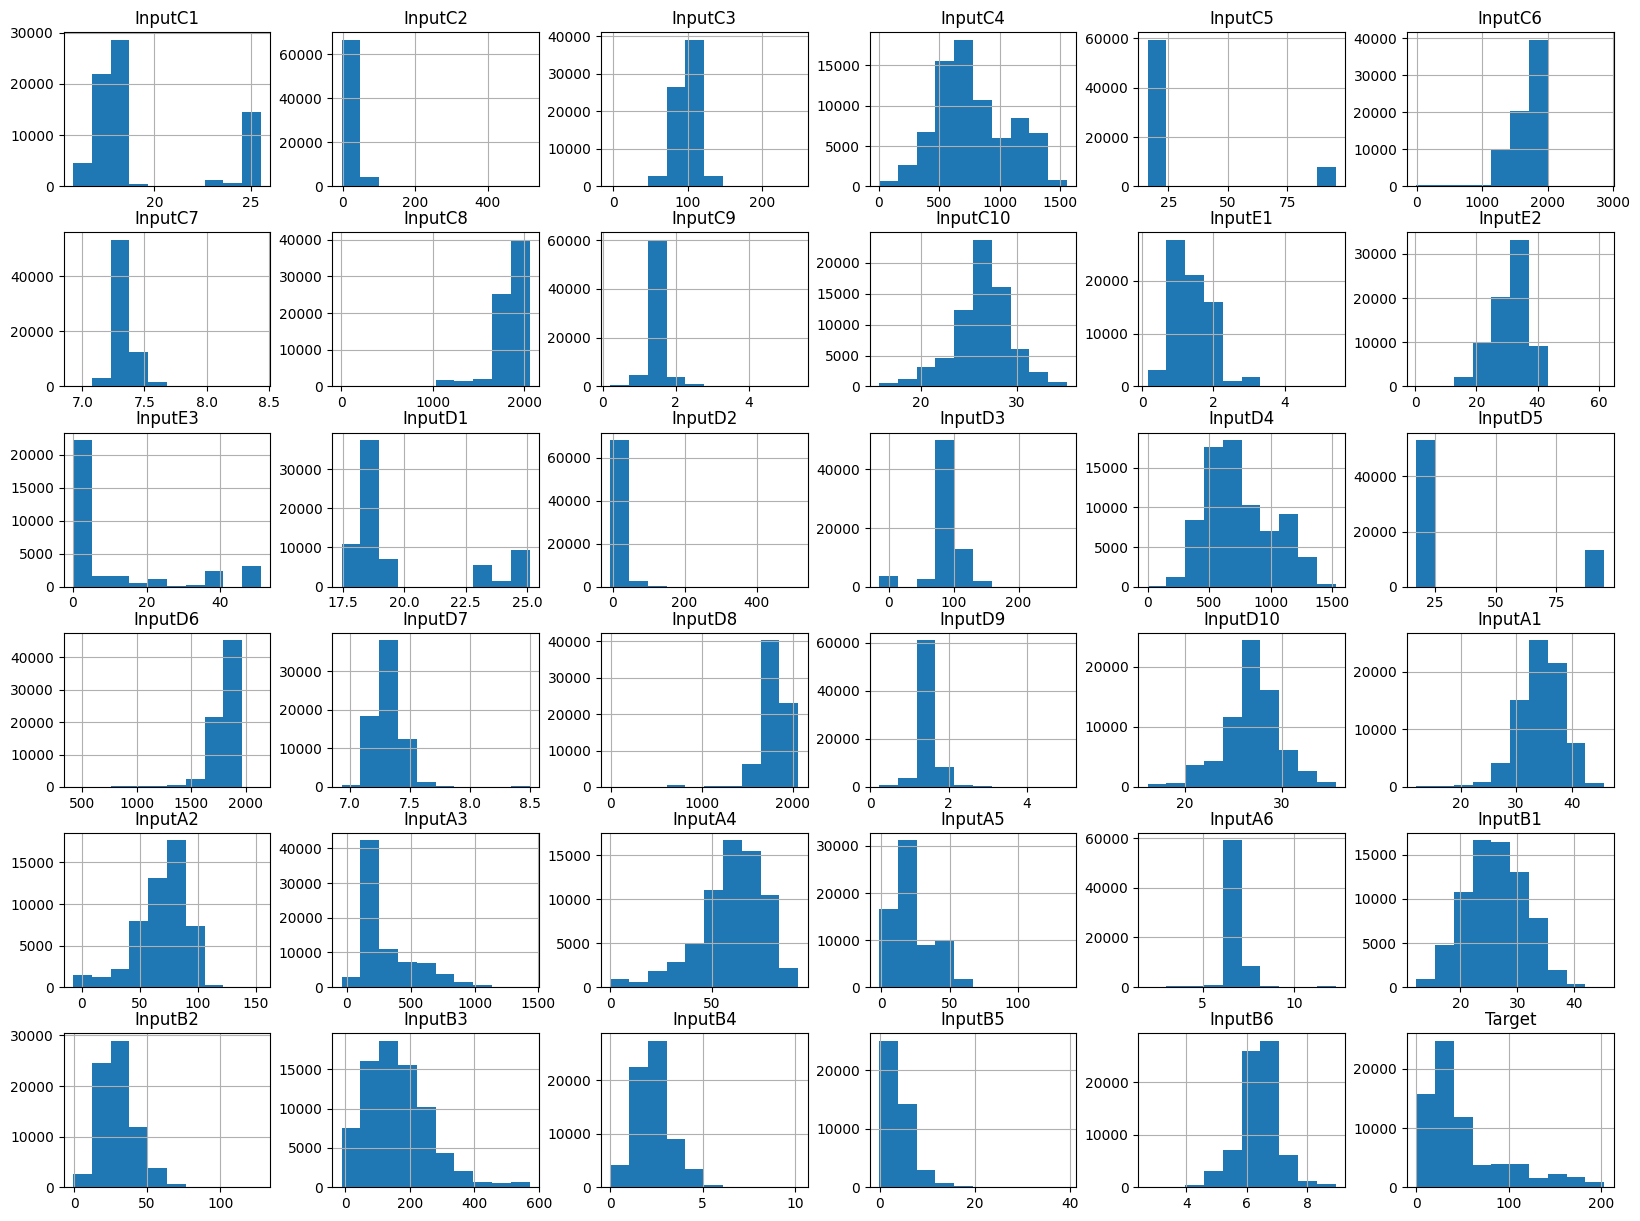

In [56]:
df.hist(figsize=(20,15))

## Exploration of Outliers

## Data Augmentation

The value that's null the most often is E3 - NO3 dissolved, let's assume that is because it is 0 or close to 0. Looking at the histogram, E3 is mostly 0.

In [57]:
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(df)
X = imputer.transform(df)

df = pd.DataFrame(X, columns=df.columns, index=df.index)

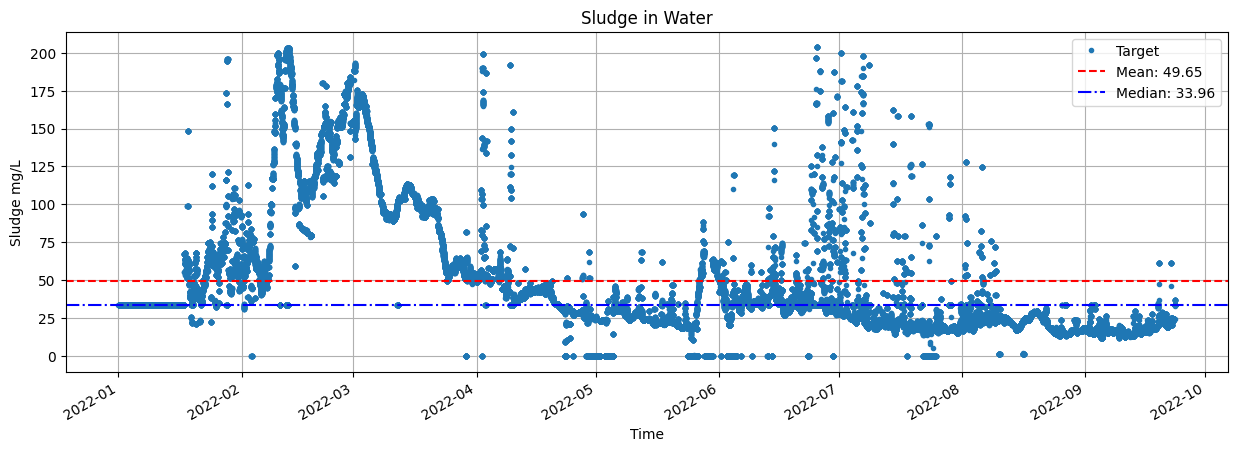

In [58]:
def plot_target(df):
  df['Target'].plot(
      style='.',
      figsize=(15, 5),
      title='Sludge in Water',
      grid=True,
      xlabel="Time",
      ylabel="Sludge mg/L"
      )

  mean_value = df['Target'].mean()
  median_value = df['Target'].median()

  plt.axhline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
  plt.axhline(median_value, color='blue', linestyle='-.', label=f'Median: {median_value:.2f}')

  plt.legend()
  plt.show()

plot_target(df)

It looks like the data was pretty unstable throughout the year with huge spikes in February, March, April and July.

### Create Features

In [59]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df
df = create_features(df)

### Investigating the seasonal anomalies

Null Ratio: 0.0


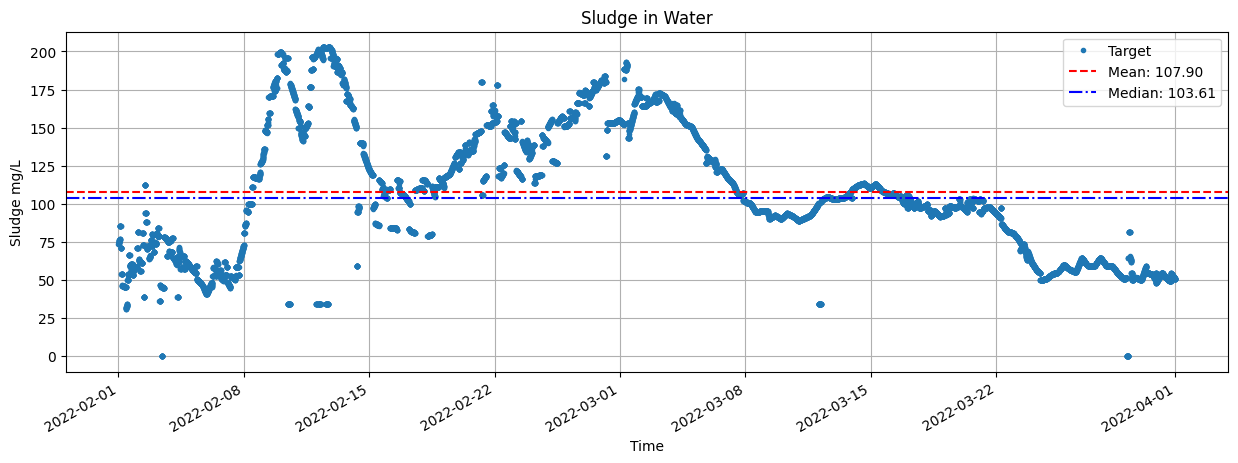

In [60]:
spring_anomalies = df.loc[(df.index > "02-01-2022") & (df.index < "04-01-2022")]
print(f"Null Ratio: {spring_anomalies['Target'].isnull().sum() / len(spring_anomalies)}")
plot_target(spring_anomalies)

Null Ratio: 0.0


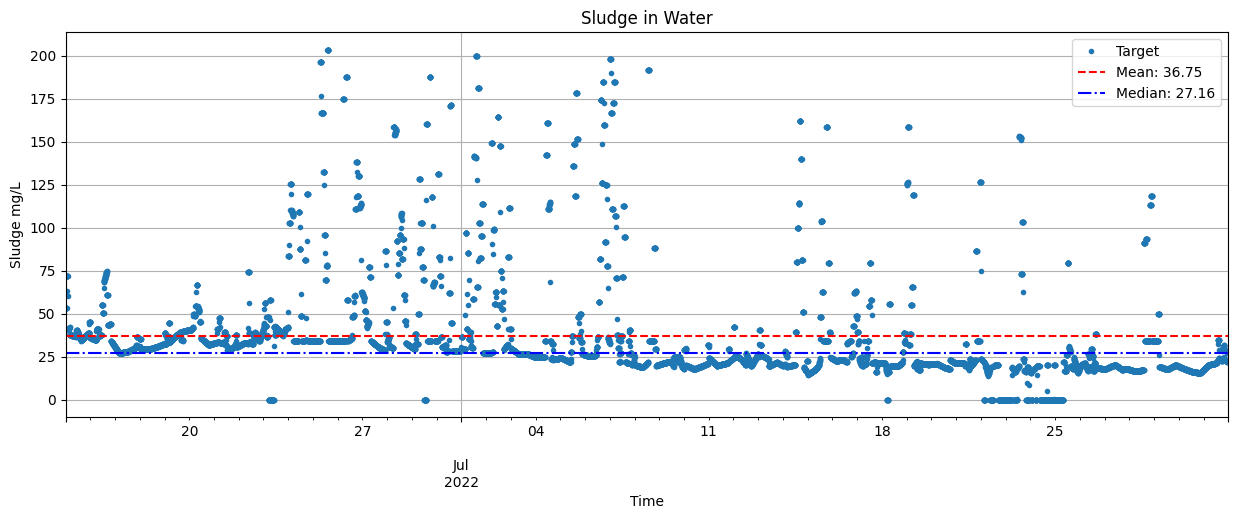

In [61]:
summer_anomalies = df.loc[(df.index > "06-15-2022") & (df.index < "08-01-2022")]
print(f"Null Ratio: {summer_anomalies['Target'].isnull().sum() / len(summer_anomalies)}")
plot_target(summer_anomalies)

For the summer anomalies, I would like to see only the outlier points

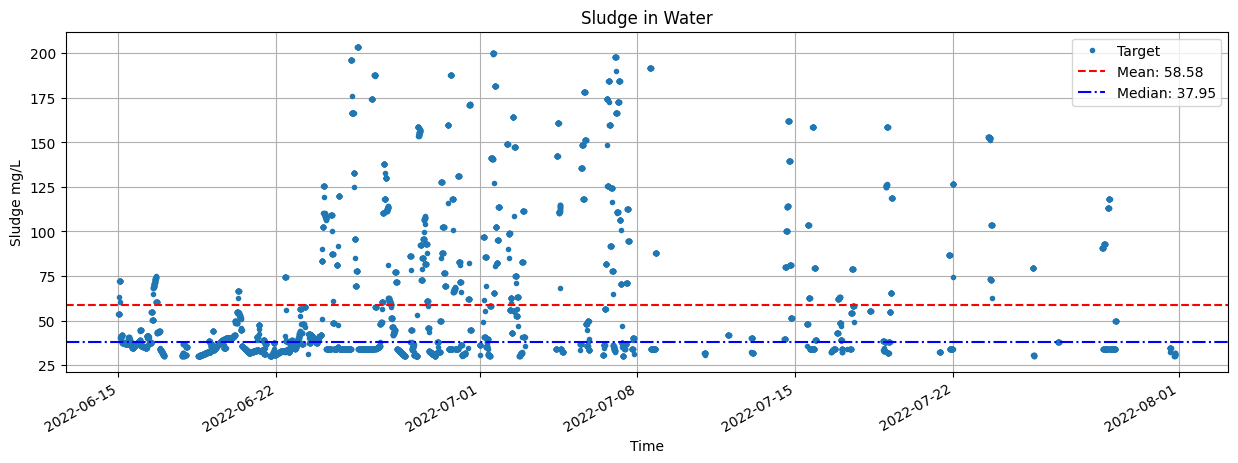

In [62]:
summer_anomalies = summer_anomalies[summer_anomalies['Target']> 30]
plot_target(summer_anomalies)

# Train our model(s)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test, is_3d=False):
    """
    Evaluate the model
    """

    if is_3d:
        X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R2 Score:", r2)

## XGBoost - Winner!

In [65]:
import xgboost as xgb

reg = xgb.XGBRegressor(
    base_score=0.5,
    booster="gbtree",
    n_estimators=10000,
    objective="reg:linear",
    eta=0.29967676424275075,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.98,
    colsample_bytree=0.8352332105721674,
    gamma=5.070672686392608,
    min_child_weight= 8.064241707732917,
)
reg.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    early_stopping_rounds=50,
    verbose=100
)


[0]	validation_0-rmse:61.88428	validation_1-rmse:61.57288


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:42:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:4.32116	validation_1-rmse:6.16456
[200]	validation_0-rmse:2.91769	validation_1-rmse:5.20905
[300]	validation_0-rmse:2.25454	validation_1-rmse:4.86285
[400]	validation_0-rmse:1.86764	validation_1-rmse:4.69565
[500]	validation_0-rmse:1.79441	validation_1-rmse:4.66629
[600]	validation_0-rmse:1.74575	validation_1-rmse:4.64889
[700]	validation_0-rmse:1.72727	validation_1-rmse:4.64126
[800]	validation_0-rmse:1.70961	validation_1-rmse:4.63507
[900]	validation_0-rmse:1.70316	validation_1-rmse:4.63318
[1000]	validation_0-rmse:1.70001	validation_1-rmse:4.63239
[1100]	validation_0-rmse:1.68960	validation_1-rmse:4.62802
[1200]	validation_0-rmse:1.68508	validation_1-rmse:4.62708
[1244]	validation_0-rmse:1.68195	validation_1-rmse:4.62700


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8352332105721674, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eta=0.29967676424275075, eval_metric=None, feature_types=None,
             gamma=5.070672686392608, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=8.064241707732917, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10000,
             n_jobs=None, num_parallel_tree=None, ...)

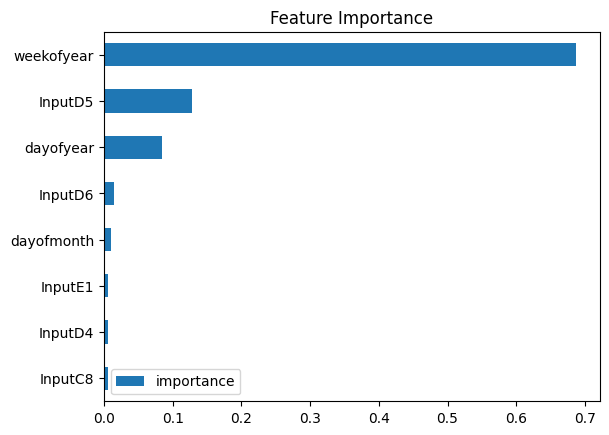

In [66]:
fi = pd.DataFrame(
    data=reg.feature_importances_, index=reg.feature_names_in_, columns=["importance"]
)
fi.sort_values("importance")[-8:].plot(kind="barh", title="Feature Importance")
plt.show()

D5 is the most important feature according to our regressor. D5 is the height of the container

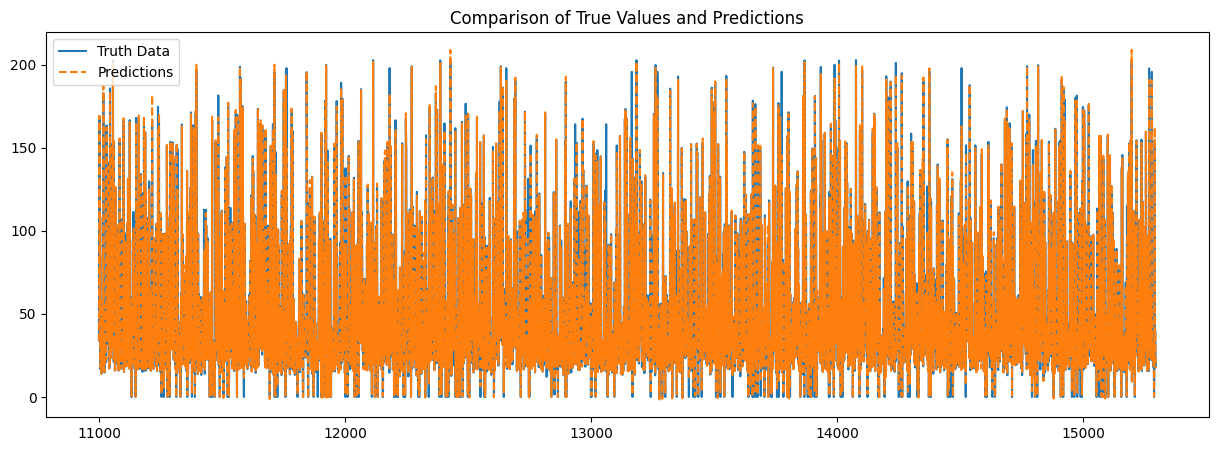

In [67]:
y_pred = reg.predict(X_test)
predict_df = pd.DataFrame({'True Values': y_test, 'Predictions': y_pred})
predict_df.index = X_test.index
plot_df = predict_df.reset_index()[11000:]

plt.figure(figsize=(15, 5))
plt.plot(plot_df['True Values'], label='Truth Data')
plt.plot(plot_df['Predictions'], label='Predictions',linestyle='--')
plt.legend()
plt.title('Comparison of True Values and Predictions')
plt.show()

Predictions for last 1000 entries

In [68]:
print("\n\nVAL SET:")
evaluate_model(reg, X_val, y_val)


print("\n\nTEST SET:")
evaluate_model(reg, X_test, y_test)



VAL SET:
Mean Absolute Error (MAE): 1.484205318111034
Mean Squared Error (MSE): 21.408610024879227
Root Mean Squared Error (RMSE): 4.6269439184929855
R2 Score: 0.9880858347883419


TEST SET:
Mean Absolute Error (MAE): 1.5361837913132077
Mean Squared Error (MSE): 24.918482572325487
Root Mean Squared Error (RMSE): 4.99184160128559
R2 Score: 0.9862332006093102


4.8 RMSE / 4.9 RMSE

5.2 / 5.7 when strategy for imputing is `most_frequent`

5.3 / 5.5 when strategy is `constant` and `fill_value=0`


Some other improvements would be to scale the data, since on the charts we can see that some columns have a long tail

XGB looks very promising, let's try improving it. To do that we will use `Optuna`, a framework for finding the best hyperparameters

In [69]:
!pip install optuna

In [70]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error


def objective(trial):
    """
    Using Optuna to find the best hyperparameters
    """
    # Define the search space for hyperparameters
    param = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'num_boost_round': 100000, # Fix the boosting round and use early stopping
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 10.0),
        'min_child_weight': trial.suggest_float('min_child_weight', 0.1, 10.0),
        'lambda': trial.suggest_float('lambda', 0.1, 10.0),
        'alpha': trial.suggest_float('alpha', 0.0, 10.0),
    }

    # Split the data into further training and validation sets (three sets are preferable)
    train_data, valid_data, train_target, valid_target = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Convert the data into DMatrix format
    dtrain = xgb.DMatrix(train_data, label=train_target)
    dvalid = xgb.DMatrix(valid_data, label=valid_target)

    # Define the pruning callback for early stopping
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'validation-rmse')

    # Train the model with early stopping
    model = xgb.train(param, dtrain, evals=[(dvalid, 'validation')], early_stopping_rounds=100, callbacks=[pruning_callback])

    # Make predictions on the test set
    dtest = xgb.DMatrix(valid_data)
    y_pred = model.predict(dtest)

    # Calculate the root mean squared error
    rmse = mean_squared_error(valid_target, y_pred, squared=False)

    return rmse

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100) # Control the number of trials

# Print the best hyperparameters and the best RMSE
best_params = study.best_params
best_rmse = study.best_value
print("Best Hyperparameters: ", best_params)
print("Best RMSE: ", best_rmse)


[I 2023-11-27 18:42:59,745] A new study created in memory with name: no-name-6c11a90f-8ac7-47b0-999e-73baaba97b4f


[0]	validation-rmse:38.74120
[1]	validation-rmse:35.40103
[2]	validation-rmse:32.45265
[3]	validation-rmse:29.82619
[4]	validation-rmse:27.51079
[5]	validation-rmse:25.44142
[6]	validation-rmse:23.63789
[7]	validation-rmse:22.08611
[8]	validation-rmse:20.73161


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:42:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	validation-rmse:19.47654


[I 2023-11-27 18:42:59,973] Trial 0 finished with value: 19.47654265934503 and parameters: {'eta': 0.1044055148070014, 'max_depth': 7, 'subsample': 0.6659132787788606, 'colsample_bytree': 0.9798906885359076, 'gamma': 6.3581604230440805, 'min_child_weight': 8.289424865790023, 'lambda': 2.935421630554226, 'alpha': 5.379245709930787}. Best is trial 0 with value: 19.47654265934503.


[0]	validation-rmse:41.02584
[1]	validation-rmse:39.60059
[2]	validation-rmse:38.22817


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation-rmse:36.90049
[4]	validation-rmse:35.66643
[5]	validation-rmse:34.47932
[6]	validation-rmse:33.33513
[7]	validation-rmse:32.22522
[8]	validation-rmse:31.17274
[9]	validation-rmse:30.18654


[I 2023-11-27 18:43:00,287] Trial 1 finished with value: 30.1865383279001 and parameters: {'eta': 0.038633011856150146, 'max_depth': 9, 'subsample': 0.8783041536639183, 'colsample_bytree': 0.6193426843339751, 'gamma': 3.399131318175803, 'min_child_weight': 3.214024652036724, 'lambda': 1.6544240451071848, 'alpha': 0.7732358159858388}. Best is trial 0 with value: 19.47654265934503.


[0]	validation-rmse:39.34713
[1]	validation-rmse:36.56160
[2]	validation-rmse:34.10668
[3]	validation-rmse:31.90682
[4]	validation-rmse:29.96424
[5]	validation-rmse:28.25043
[6]	validation-rmse:26.76893
[7]	validation-rmse:25.44385
[8]	validation-rmse:24.28523
[9]	validation-rmse:23.26948


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-27 18:43:00,478] Trial 2 finished with value: 23.26947722891366 and parameters: {'eta': 0.09340376157833387, 'max_depth': 4, 'subsample': 0.7464554816822165, 'colsample_bytree': 0.8974823970041713, 'gamma': 1.4476273433498454, 'min_child_weight': 9.834105283854518, 'lambda': 6.757803110140239, 'alpha': 1.8261584263310082}. Best is trial 0 with value: 19.47654265934503.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:41.69982
[1]	validation-rmse:40.94903
[2]	validation-rmse:40.22704
[3]	validation-rmse:39.52309
[4]	validation-rmse:38.82731
[5]	validation-rmse:38.14084
[6]	validation-rmse:37.47505
[7]	validation-rmse:36.82036
[8]	validation-rmse:36.18873
[9]	validation-rmse:35.55444


[I 2023-11-27 18:43:00,804] Trial 3 finished with value: 35.554443180669416 and parameters: {'eta': 0.020301159314147783, 'max_depth': 10, 'subsample': 0.7021683698495591, 'colsample_bytree': 0.8866134275955859, 'gamma': 0.2154354119455426, 'min_child_weight': 9.399250926042644, 'lambda': 4.8667227045473895, 'alpha': 4.326542004652264}. Best is trial 0 with value: 19.47654265934503.


[0]	validation-rmse:35.15502
[1]	validation-rmse:29.33649


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:24.76649
[3]	validation-rmse:21.20385
[4]	validation-rmse:18.30813
[5]	validation-rmse:16.05775
[6]	validation-rmse:14.35601
[7]	validation-rmse:13.06962
[8]	validation-rmse:12.09300
[9]	validation-rmse:11.33653


[I 2023-11-27 18:43:01,198] Trial 4 finished with value: 11.336532969058611 and parameters: {'eta': 0.1987109644575537, 'max_depth': 10, 'subsample': 0.5313623886234368, 'colsample_bytree': 0.9688564148436544, 'gamma': 2.087607488132004, 'min_child_weight': 2.5028733202059676, 'lambda': 6.187938302598843, 'alpha': 5.169662501526514}. Best is trial 4 with value: 11.336532969058611.


[0]	validation-rmse:33.05473
[1]	validation-rmse:26.58998
[2]	validation-rmse:22.42111
[3]	validation-rmse:19.56509
[4]	validation-rmse:17.77194
[5]	validation-rmse:16.65615
[6]	validation-rmse:15.94440
[7]	validation-rmse:15.38421
[8]	validation-rmse:15.05693
[9]	validation-rmse:14.59333


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-27 18:43:01,397] Trial 5 finished with value: 14.593327513838245 and parameters: {'eta': 0.28225008924827705, 'max_depth': 5, 'subsample': 0.6864648230844396, 'colsample_bytree': 0.6158828664076024, 'gamma': 1.8674344890164096, 'min_child_weight': 5.332698918625128, 'lambda': 4.1352304797950294, 'alpha': 9.152048957178327}. Best is trial 4 with value: 11.336532969058611.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:40.10005


[I 2023-11-27 18:43:01,515] Trial 6 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:40.65405


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-27 18:43:01,644] Trial 7 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:38.68203
[1]	validation-rmse:35.38953
[2]	validation-rmse:32.51270
[3]	validation-rmse:30.04039
[4]	validation-rmse:27.90490
[5]	validation-rmse:26.07460
[6]	validation-rmse:24.46166
[7]	validation-rmse:23.02260
[8]	validation-rmse:21.80184
[9]	validation-rmse:20.74723


[I 2023-11-27 18:43:01,841] Trial 8 finished with value: 20.747227234647852 and parameters: {'eta': 0.10950819797948677, 'max_depth': 5, 'subsample': 0.7287824224473327, 'colsample_bytree': 0.943971554702606, 'gamma': 1.350468024540984, 'min_child_weight': 4.055275058377927, 'lambda': 6.121112270076845, 'alpha': 5.4238597988205415}. Best is trial 4 with value: 11.336532969058611.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:34.63597
[1]	validation-rmse:29.23419
[2]	validation-rmse:25.65590
[3]	validation-rmse:23.11054
[4]	validation-rmse:21.33892
[5]	validation-rmse:20.26077
[6]	validation-rmse:19.52512
[7]	validation-rmse:19.02181
[8]	validation-rmse:18.60728
[9]	validation-rmse:18.26648


[I 2023-11-27 18:43:02,017] Trial 9 finished with value: 18.266482640157903 and parameters: {'eta': 0.2578570473123431, 'max_depth': 3, 'subsample': 0.9089731889828392, 'colsample_bytree': 0.7201452340352823, 'gamma': 3.1238640723903552, 'min_child_weight': 3.840077003462596, 'lambda': 6.5717364094485795, 'alpha': 0.8910336520508244}. Best is trial 4 with value: 11.336532969058611.


[0]	validation-rmse:35.06791
[1]	validation-rmse:29.17995
[2]	validation-rmse:24.64314
[3]	validation-rmse:21.14765


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[4]	validation-rmse:18.36916
[5]	validation-rmse:16.32823
[6]	validation-rmse:14.78472
[7]	validation-rmse:13.62467
[8]	validation-rmse:12.72273
[9]	validation-rmse:12.01054


[I 2023-11-27 18:43:02,322] Trial 10 finished with value: 12.010536773261324 and parameters: {'eta': 0.19932999196379478, 'max_depth': 8, 'subsample': 0.5272029023754099, 'colsample_bytree': 0.7925785293827776, 'gamma': 4.380471283508335, 'min_child_weight': 0.8421347541762436, 'lambda': 0.5985687139001996, 'alpha': 7.621664445078777}. Best is trial 4 with value: 11.336532969058611.


[0]	validation-rmse:35.13988
[1]	validation-rmse:29.29097
[2]	validation-rmse:24.72258


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation-rmse:21.21364
[4]	validation-rmse:18.46514
[5]	validation-rmse:16.35853
[6]	validation-rmse:14.83748
[7]	validation-rmse:13.65612
[8]	validation-rmse:12.79099
[9]	validation-rmse:12.07923


[I 2023-11-27 18:43:02,662] Trial 11 finished with value: 12.079233446748317 and parameters: {'eta': 0.1976345046642386, 'max_depth': 8, 'subsample': 0.5102865856792521, 'colsample_bytree': 0.79859209893326, 'gamma': 4.344539212690341, 'min_child_weight': 0.18829783921895316, 'lambda': 1.2055462291099834, 'alpha': 7.592052005105816}. Best is trial 4 with value: 11.336532969058611.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:35.47137
[1]	validation-rmse:29.79674
[2]	validation-rmse:25.22156
[3]	validation-rmse:21.55156
[4]	validation-rmse:18.59124
[5]	validation-rmse:16.22796
[6]	validation-rmse:14.35256
[7]	validation-rmse:12.94062
[8]	validation-rmse:11.82494
[9]	validation-rmse:10.92712


[I 2023-11-27 18:43:04,116] Trial 12 finished with value: 10.927117550600402 and parameters: {'eta': 0.1819733098181039, 'max_depth': 10, 'subsample': 0.5862366222223026, 'colsample_bytree': 0.998824982782293, 'gamma': 4.5990991422661445, 'min_child_weight': 0.6195424151749555, 'lambda': 0.2725086245274882, 'alpha': 7.289509306828821}. Best is trial 12 with value: 10.927117550600402.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-27 18:43:04,528] Trial 13 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:34.32765
[1]	validation-rmse:28.10096
[2]	validation-rmse:23.32360
[3]	validation-rmse:19.63746
[4]	validation-rmse:16.81751
[5]	validation-rmse:14.78711
[6]	validation-rmse:13.22107
[7]	validation-rmse:12.10341
[8]	validation-rmse:11.28075
[9]	validation-rmse:10.61199


[I 2023-11-27 18:43:04,973] Trial 14 finished with value: 10.611988060406597 and parameters: {'eta': 0.2189344661275887, 'max_depth': 9, 'subsample': 0.5892088832158476, 'colsample_bytree': 0.9776953209609527, 'gamma': 2.9604927730899733, 'min_child_weight': 1.7818660539519442, 'lambda': 2.3904383931061073, 'alpha': 9.453027791819375}. Best is trial 14 with value: 10.611988060406597.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:33.20383
[1]	validation-rmse:26.33501
[2]	validation-rmse:21.28801
[3]	validation-rmse:17.72717
[4]	validation-rmse:15.05053
[5]	validation-rmse:13.24343
[6]	validation-rmse:11.88699
[7]	validation-rmse:11.01948
[8]	validation-rmse:10.35456
[9]	validation-rmse:9.82647


[I 2023-11-27 18:43:05,482] Trial 15 finished with value: 9.82646788560612 and parameters: {'eta': 0.25203598515970804, 'max_depth': 9, 'subsample': 0.6154537043075968, 'colsample_bytree': 0.987790623382928, 'gamma': 5.463989652019786, 'min_child_weight': 0.28991878978902275, 'lambda': 2.1286596283994514, 'alpha': 9.851830307035701}. Best is trial 15 with value: 9.82646788560612.


[0]	validation-rmse:33.06976
[1]	validation-rmse:26.26186
[2]	validation-rmse:21.39961
[3]	validation-rmse:17.97419


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[4]	validation-rmse:15.50413
[5]	validation-rmse:13.87144
[6]	validation-rmse:12.76664
[7]	validation-rmse:11.91300
[8]	validation-rmse:11.34648
[9]	validation-rmse:10.98544


[I 2023-11-27 18:43:05,768] Trial 16 finished with value: 10.985436033874885 and parameters: {'eta': 0.25657831814803306, 'max_depth': 8, 'subsample': 0.6199441141774704, 'colsample_bytree': 0.5076916944109725, 'gamma': 6.074556112967143, 'min_child_weight': 1.4964482709751166, 'lambda': 2.4378844789059873, 'alpha': 9.877471550996376}. Best is trial 15 with value: 9.82646788560612.


[0]	validation-rmse:33.75145
[1]	validation-rmse:27.18685


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:22.27876
[3]	validation-rmse:18.67275
[4]	validation-rmse:15.99765
[5]	validation-rmse:14.08826
[6]	validation-rmse:12.69044
[7]	validation-rmse:11.66813
[8]	validation-rmse:10.93956
[9]	validation-rmse:10.28683


[I 2023-11-27 18:43:06,159] Trial 17 finished with value: 10.286830085650175 and parameters: {'eta': 0.23170284327346663, 'max_depth': 9, 'subsample': 0.8273352919015627, 'colsample_bytree': 0.9157696676408102, 'gamma': 5.475317112973308, 'min_child_weight': 0.20815300826171956, 'lambda': 3.2065492708916157, 'alpha': 9.212516448414057}. Best is trial 15 with value: 9.82646788560612.


[0]	validation-rmse:33.85251
[1]	validation-rmse:27.46753
[2]	validation-rmse:22.83253
[3]	validation-rmse:19.44955
[4]	validation-rmse:16.97627


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	validation-rmse:15.27005
[6]	validation-rmse:14.09182
[7]	validation-rmse:13.19502
[8]	validation-rmse:12.64644
[9]	validation-rmse:12.17394


[I 2023-11-27 18:43:06,418] Trial 18 pruned. Trial was pruned at iteration 9.


[0]	validation-rmse:31.80200


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:24.39489
[2]	validation-rmse:19.33570
[3]	validation-rmse:15.82810
[4]	validation-rmse:13.31791
[5]	validation-rmse:11.75241
[6]	validation-rmse:10.64731
[7]	validation-rmse:9.81323
[8]	validation-rmse:9.37905
[9]	validation-rmse:8.90232


[I 2023-11-27 18:43:06,816] Trial 19 finished with value: 8.902320772483192 and parameters: {'eta': 0.28076314726225043, 'max_depth': 9, 'subsample': 0.8063288996887824, 'colsample_bytree': 0.854697609933141, 'gamma': 7.211606515766895, 'min_child_weight': 0.15324440303852588, 'lambda': 1.7595126823542506, 'alpha': 9.952679421900628}. Best is trial 19 with value: 8.902320772483192.


[0]	validation-rmse:32.03863
[1]	validation-rmse:25.11912
[2]	validation-rmse:20.71413
[3]	validation-rmse:17.83800
[4]	validation-rmse:15.97201
[5]	validation-rmse:14.85483


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	validation-rmse:14.10475
[7]	validation-rmse:13.58609
[8]	validation-rmse:13.16191


[I 2023-11-27 18:43:07,040] Trial 20 pruned. Trial was pruned at iteration 8.


[0]	validation-rmse:32.28745


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:25.05606
[2]	validation-rmse:19.97880
[3]	validation-rmse:16.46937
[4]	validation-rmse:14.05208
[5]	validation-rmse:12.51697
[6]	validation-rmse:11.41006
[7]	validation-rmse:10.47047
[8]	validation-rmse:9.82196
[9]	validation-rmse:9.45728


[I 2023-11-27 18:43:07,463] Trial 21 finished with value: 9.457279850479178 and parameters: {'eta': 0.27230726991540705, 'max_depth': 9, 'subsample': 0.820330833161248, 'colsample_bytree': 0.9215837629042911, 'gamma': 5.318882255033648, 'min_child_weight': 0.6375097882988301, 'lambda': 3.518919996163424, 'alpha': 9.916449797521825}. Best is trial 19 with value: 8.902320772483192.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.92499
[1]	validation-rmse:24.61957
[2]	validation-rmse:19.59967
[3]	validation-rmse:15.88846
[4]	validation-rmse:13.39288
[5]	validation-rmse:11.83976
[6]	validation-rmse:10.65420
[7]	validation-rmse:9.92786
[8]	validation-rmse:9.43540
[9]	validation-rmse:9.02770


[I 2023-11-27 18:43:07,853] Trial 22 finished with value: 9.027698259797457 and parameters: {'eta': 0.2765540364140612, 'max_depth': 9, 'subsample': 0.793803218727225, 'colsample_bytree': 0.8518434444386586, 'gamma': 6.912005738593501, 'min_child_weight': 0.987498533154644, 'lambda': 2.0192653446633626, 'alpha': 9.923152054911643}. Best is trial 19 with value: 8.902320772483192.


[0]	validation-rmse:32.24075
[1]	validation-rmse:25.05967
[2]	validation-rmse:20.28423


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation-rmse:16.80689
[4]	validation-rmse:14.66349
[5]	validation-rmse:13.12305
[6]	validation-rmse:12.19969
[7]	validation-rmse:11.37724
[8]	validation-rmse:10.84104
[9]	validation-rmse:10.46196


[I 2023-11-27 18:43:08,171] Trial 23 finished with value: 10.461964957373855 and parameters: {'eta': 0.2782070165337859, 'max_depth': 8, 'subsample': 0.794596652282785, 'colsample_bytree': 0.8413044408866088, 'gamma': 7.297260887119185, 'min_child_weight': 2.2788353964754204, 'lambda': 3.7640259681603396, 'alpha': 8.512111292520956}. Best is trial 19 with value: 8.902320772483192.


[0]	validation-rmse:31.67823


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:24.12021
[2]	validation-rmse:19.11892
[3]	validation-rmse:15.59393
[4]	validation-rmse:13.33972
[5]	validation-rmse:11.88991
[6]	validation-rmse:10.97273
[7]	validation-rmse:10.28879
[8]	validation-rmse:9.76996
[9]	validation-rmse:9.32121


[I 2023-11-27 18:43:08,569] Trial 24 finished with value: 9.321208211394838 and parameters: {'eta': 0.2877008664394748, 'max_depth': 9, 'subsample': 0.8465792987247084, 'colsample_bytree': 0.8281621747170581, 'gamma': 8.189173116704838, 'min_child_weight': 0.9940032340649928, 'lambda': 1.3706152453517872, 'alpha': 9.906776411629638}. Best is trial 19 with value: 8.902320772483192.


[0]	validation-rmse:31.87212
[1]	validation-rmse:24.55314
[2]	validation-rmse:19.92595
[3]	validation-rmse:16.84936
[4]	validation-rmse:14.89487


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	validation-rmse:13.69917
[6]	validation-rmse:12.93892
[7]	validation-rmse:12.41059


[I 2023-11-27 18:43:08,815] Trial 25 pruned. Trial was pruned at iteration 8.


[0]	validation-rmse:32.36380
[1]	validation-rmse:25.08778
[2]	validation-rmse:20.05852


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation-rmse:16.68176
[4]	validation-rmse:14.38622
[5]	validation-rmse:12.73356
[6]	validation-rmse:11.78176
[7]	validation-rmse:10.95938
[8]	validation-rmse:10.50193
[9]	validation-rmse:10.07904


[I 2023-11-27 18:43:09,125] Trial 26 finished with value: 10.079038925648613 and parameters: {'eta': 0.27116119030306224, 'max_depth': 8, 'subsample': 0.7679019366049378, 'colsample_bytree': 0.7774913113904162, 'gamma': 7.155458716259876, 'min_child_weight': 2.3162026335880164, 'lambda': 1.174365588927289, 'alpha': 6.314982740627345}. Best is trial 19 with value: 8.902320772483192.


[0]	validation-rmse:31.35299


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:23.62869
[2]	validation-rmse:18.60987
[3]	validation-rmse:15.06435
[4]	validation-rmse:12.90371
[5]	validation-rmse:11.50229
[6]	validation-rmse:10.57851
[7]	validation-rmse:9.82801
[8]	validation-rmse:9.39788
[9]	validation-rmse:9.08233


[I 2023-11-27 18:43:09,559] Trial 27 finished with value: 9.082334234898424 and parameters: {'eta': 0.29695063243327097, 'max_depth': 9, 'subsample': 0.868863012575925, 'colsample_bytree': 0.8316931731689352, 'gamma': 8.246556861151635, 'min_child_weight': 1.083744589660851, 'lambda': 1.7678850199657175, 'alpha': 8.216836634548287}. Best is trial 19 with value: 8.902320772483192.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.08913
[1]	validation-rmse:23.26450
[2]	validation-rmse:18.12917
[3]	validation-rmse:14.39884
[4]	validation-rmse:11.87259
[5]	validation-rmse:10.37423
[6]	validation-rmse:9.36407
[7]	validation-rmse:8.73914
[8]	validation-rmse:8.23476
[9]	validation-rmse:7.84822


[I 2023-11-27 18:43:10,008] Trial 28 finished with value: 7.848222081888777 and parameters: {'eta': 0.2976111085895399, 'max_depth': 10, 'subsample': 0.952989954485306, 'colsample_bytree': 0.871770165618622, 'gamma': 9.265395776027564, 'min_child_weight': 1.979553063630787, 'lambda': 2.2067127536395486, 'alpha': 8.081287473765737}. Best is trial 28 with value: 7.848222081888777.


[0]	validation-rmse:33.11752


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:26.15863
[2]	validation-rmse:21.13095
[3]	validation-rmse:17.29943
[4]	validation-rmse:14.52364
[5]	validation-rmse:12.62388
[6]	validation-rmse:11.26040
[7]	validation-rmse:10.20632
[8]	validation-rmse:9.53953
[9]	validation-rmse:8.92530


[I 2023-11-27 18:43:10,448] Trial 29 finished with value: 8.925297491482425 and parameters: {'eta': 0.24532730690202031, 'max_depth': 10, 'subsample': 0.9726135405288878, 'colsample_bytree': 0.869743296335758, 'gamma': 9.507277778302146, 'min_child_weight': 5.91638270029455, 'lambda': 2.7948936559774475, 'alpha': 9.11235704278956}. Best is trial 28 with value: 7.848222081888777.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:33.32934
[1]	validation-rmse:26.52295
[2]	validation-rmse:21.55457
[3]	validation-rmse:17.75354
[4]	validation-rmse:14.94595
[5]	validation-rmse:12.92338
[6]	validation-rmse:11.42363
[7]	validation-rmse:10.40940
[8]	validation-rmse:9.73786
[9]	validation-rmse:9.08872


[I 2023-11-27 18:43:10,898] Trial 30 finished with value: 9.088722773442736 and parameters: {'eta': 0.23980662505713624, 'max_depth': 10, 'subsample': 0.9606292752030359, 'colsample_bytree': 0.8803825568958851, 'gamma': 9.964273658864276, 'min_child_weight': 5.781696635712092, 'lambda': 2.6878851179252474, 'alpha': 9.100335291588596}. Best is trial 28 with value: 7.848222081888777.


[0]	validation-rmse:32.34205
[1]	validation-rmse:25.05256


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:19.97710
[3]	validation-rmse:16.25260
[4]	validation-rmse:13.66651
[5]	validation-rmse:11.90422
[6]	validation-rmse:10.65076
[7]	validation-rmse:9.73298
[8]	validation-rmse:9.01384
[9]	validation-rmse:8.55119


[I 2023-11-27 18:43:11,330] Trial 31 finished with value: 8.55118694797527 and parameters: {'eta': 0.26619238036077597, 'max_depth': 10, 'subsample': 0.9626154007099915, 'colsample_bytree': 0.8662466819316957, 'gamma': 9.085954410869693, 'min_child_weight': 6.828185083083316, 'lambda': 2.6541025247235615, 'alpha': 9.267644181309283}. Best is trial 28 with value: 7.848222081888777.


[0]	validation-rmse:32.45037
[1]	validation-rmse:25.14711


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:20.01838
[3]	validation-rmse:16.25372
[4]	validation-rmse:13.64429
[5]	validation-rmse:11.89065
[6]	validation-rmse:10.70425
[7]	validation-rmse:9.85527
[8]	validation-rmse:9.24861
[9]	validation-rmse:8.87033


[I 2023-11-27 18:43:11,772] Trial 32 finished with value: 8.870329717536507 and parameters: {'eta': 0.26414972242774176, 'max_depth': 10, 'subsample': 0.9983351670194144, 'colsample_bytree': 0.8678518481467343, 'gamma': 9.15725614096622, 'min_child_weight': 6.432891516397589, 'lambda': 2.779310762211872, 'alpha': 8.08120752539077}. Best is trial 28 with value: 7.848222081888777.


[0]	validation-rmse:32.47527
[1]	validation-rmse:25.20603


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:20.11302
[3]	validation-rmse:16.50555
[4]	validation-rmse:13.82877
[5]	validation-rmse:12.03185
[6]	validation-rmse:10.72979
[7]	validation-rmse:9.89014
[8]	validation-rmse:9.41532
[9]	validation-rmse:8.82365


[I 2023-11-27 18:43:12,196] Trial 33 finished with value: 8.823649646408445 and parameters: {'eta': 0.26268435068149815, 'max_depth': 10, 'subsample': 0.999599761606876, 'colsample_bytree': 0.9416326621732578, 'gamma': 9.191526713353099, 'min_child_weight': 6.586973713141021, 'lambda': 2.883091786705678, 'alpha': 7.971842077281721}. Best is trial 28 with value: 7.848222081888777.


[0]	validation-rmse:32.43583
[1]	validation-rmse:25.15782


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:20.01546
[3]	validation-rmse:16.48712
[4]	validation-rmse:13.88509
[5]	validation-rmse:12.16426
[6]	validation-rmse:10.87051
[7]	validation-rmse:9.88432
[8]	validation-rmse:9.21760
[9]	validation-rmse:8.77447


[I 2023-11-27 18:43:12,632] Trial 34 finished with value: 8.77446809447319 and parameters: {'eta': 0.26346040390383796, 'max_depth': 10, 'subsample': 0.9953289010812998, 'colsample_bytree': 0.9433158621591671, 'gamma': 9.125088418774439, 'min_child_weight': 6.725639976798357, 'lambda': 2.882784081924801, 'alpha': 6.666018159598208}. Best is trial 28 with value: 7.848222081888777.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-27 18:43:12,799] Trial 35 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:32.90424
[1]	validation-rmse:25.83641
[2]	validation-rmse:20.69857
[3]	validation-rmse:17.02035
[4]	validation-rmse:14.30825
[5]	validation-rmse:12.47404
[6]	validation-rmse:11.19184
[7]	validation-rmse:10.23856
[8]	validation-rmse:9.50252
[9]	validation-rmse:8.92510


[I 2023-11-27 18:43:13,218] Trial 36 finished with value: 8.9251037531716 and parameters: {'eta': 0.25275704510506863, 'max_depth': 10, 'subsample': 0.9893773307340429, 'colsample_bytree': 0.910721884975483, 'gamma': 8.892500878856392, 'min_child_weight': 7.097647669771382, 'lambda': 3.15229515606098, 'alpha': 6.815412303724429}. Best is trial 28 with value: 7.848222081888777.


[0]	validation-rmse:32.60338


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:25.40619
[2]	validation-rmse:20.19739
[3]	validation-rmse:16.62382
[4]	validation-rmse:14.05582
[5]	validation-rmse:12.23275
[6]	validation-rmse:11.03339
[7]	validation-rmse:10.20659
[8]	validation-rmse:9.57951
[9]	validation-rmse:9.14196


[I 2023-11-27 18:43:13,638] Trial 37 finished with value: 9.141959939728173 and parameters: {'eta': 0.26508525138650924, 'max_depth': 10, 'subsample': 0.9489275899458863, 'colsample_bytree': 0.9536655185570145, 'gamma': 9.46780919062999, 'min_child_weight': 8.30495576852551, 'lambda': 3.973359660888247, 'alpha': 7.960356130239878}. Best is trial 28 with value: 7.848222081888777.


[0]	validation-rmse:34.22611


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-27 18:43:13,835] Trial 38 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.95011
[1]	validation-rmse:24.50759
[2]	validation-rmse:19.47605
[3]	validation-rmse:16.14584
[4]	validation-rmse:13.83502
[5]	validation-rmse:12.38318
[6]	validation-rmse:11.06588
[7]	validation-rmse:10.32112
[8]	validation-rmse:9.75109
[9]	validation-rmse:9.34524


[I 2023-11-27 18:43:14,231] Trial 39 finished with value: 9.345241068424015 and parameters: {'eta': 0.28811395087771274, 'max_depth': 9, 'subsample': 0.9040979428967791, 'colsample_bytree': 0.950675981113286, 'gamma': 8.692953224475808, 'min_child_weight': 6.661370997004517, 'lambda': 5.417502632540204, 'alpha': 7.0121539078433806}. Best is trial 28 with value: 7.848222081888777.


[0]	validation-rmse:33.90835


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-27 18:43:14,393] Trial 40 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:32.44494
[1]	validation-rmse:25.13897
[2]	validation-rmse:20.01573
[3]	validation-rmse:16.32574
[4]	validation-rmse:13.76607
[5]	validation-rmse:11.91727
[6]	validation-rmse:10.71039
[7]	validation-rmse:9.70489
[8]	validation-rmse:9.07421
[9]	validation-rmse:8.55908


[I 2023-11-27 18:43:14,848] Trial 41 finished with value: 8.559077707649834 and parameters: {'eta': 0.2630124533782755, 'max_depth': 10, 'subsample': 0.9852109560613644, 'colsample_bytree': 0.894822355607043, 'gamma': 9.091983900915181, 'min_child_weight': 6.333552381464902, 'lambda': 2.564356601836728, 'alpha': 7.817599594976832}. Best is trial 28 with value: 7.848222081888777.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:32.21732
[1]	validation-rmse:24.87265
[2]	validation-rmse:19.66211
[3]	validation-rmse:16.02809
[4]	validation-rmse:13.46990
[5]	validation-rmse:11.66615
[6]	validation-rmse:10.40778
[7]	validation-rmse:9.42939
[8]	validation-rmse:8.81439
[9]	validation-rmse:8.37376


[I 2023-11-27 18:43:15,322] Trial 42 finished with value: 8.373761016482035 and parameters: {'eta': 0.26586641356172247, 'max_depth': 10, 'subsample': 0.9448656729770035, 'colsample_bytree': 0.8939119829180149, 'gamma': 9.938870391462919, 'min_child_weight': 5.54530165500643, 'lambda': 2.3643644093959497, 'alpha': 7.682630350325124}. Best is trial 28 with value: 7.848222081888777.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.54211
[1]	validation-rmse:23.92963
[2]	validation-rmse:18.62640
[3]	validation-rmse:15.05662
[4]	validation-rmse:12.66150
[5]	validation-rmse:11.13668
[6]	validation-rmse:9.94597
[7]	validation-rmse:9.20087
[8]	validation-rmse:8.68513
[9]	validation-rmse:8.40280


[I 2023-11-27 18:43:16,781] Trial 43 finished with value: 8.402803193578208 and parameters: {'eta': 0.28520655180872506, 'max_depth': 10, 'subsample': 0.9327846000626645, 'colsample_bytree': 0.8942889976632592, 'gamma': 9.620630932596313, 'min_child_weight': 5.644059926510466, 'lambda': 2.1276021645227567, 'alpha': 6.4361620060239675}. Best is trial 28 with value: 7.848222081888777.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-27 18:43:17,000] Trial 44 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:30.76562
[1]	validation-rmse:22.84940
[2]	validation-rmse:17.42137
[3]	validation-rmse:13.98176
[4]	validation-rmse:11.57826
[5]	validation-rmse:10.11570
[6]	validation-rmse:9.16261
[7]	validation-rmse:8.54941
[8]	validation-rmse:8.06372
[9]	validation-rmse:7.81148


[I 2023-11-27 18:43:17,559] Trial 45 finished with value: 7.811483633346907 and parameters: {'eta': 0.29974526565325155, 'max_depth': 10, 'subsample': 0.8969367747681147, 'colsample_bytree': 0.8921381472017217, 'gamma': 8.619211962734607, 'min_child_weight': 4.368045683061806, 'lambda': 0.762730244140702, 'alpha': 5.455187475857397}. Best is trial 45 with value: 7.811483633346907.


[0]	validation-rmse:31.09105


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:23.40568
[2]	validation-rmse:18.32649
[3]	validation-rmse:14.89159
[4]	validation-rmse:12.65595
[5]	validation-rmse:11.17053
[6]	validation-rmse:10.11184
[7]	validation-rmse:9.51255
[8]	validation-rmse:8.91204
[9]	validation-rmse:8.51217


[I 2023-11-27 18:43:18,025] Trial 46 finished with value: 8.51216912445311 and parameters: {'eta': 0.29734414651791896, 'max_depth': 9, 'subsample': 0.9021361691692006, 'colsample_bytree': 0.88542522543721, 'gamma': 8.502803122135287, 'min_child_weight': 4.616155519773588, 'lambda': 0.7087414334918911, 'alpha': 5.525169134021203}. Best is trial 45 with value: 7.811483633346907.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.43905
[1]	validation-rmse:23.85957
[2]	validation-rmse:18.75468
[3]	validation-rmse:15.21742
[4]	validation-rmse:12.98599
[5]	validation-rmse:11.39661
[6]	validation-rmse:10.29336
[7]	validation-rmse:9.67653
[8]	validation-rmse:9.03459
[9]	validation-rmse:8.80714


[I 2023-11-27 18:43:18,425] Trial 47 finished with value: 8.807141686719232 and parameters: {'eta': 0.28773254543301363, 'max_depth': 9, 'subsample': 0.888649947901326, 'colsample_bytree': 0.8885419363031957, 'gamma': 8.542327186085693, 'min_child_weight': 4.379657296395709, 'lambda': 0.5353183620334045, 'alpha': 4.595768062127071}. Best is trial 45 with value: 7.811483633346907.


[0]	validation-rmse:31.52528
[1]	validation-rmse:24.08995
[2]	validation-rmse:19.08820
[3]	validation-rmse:15.86910


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[4]	validation-rmse:13.68838
[5]	validation-rmse:12.22042
[6]	validation-rmse:11.45110


[I 2023-11-27 18:43:18,664] Trial 48 pruned. Trial was pruned at iteration 6.


[0]	validation-rmse:32.99328


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-27 18:43:18,814] Trial 49 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:32.84065


[I 2023-11-27 18:43:19,010] Trial 50 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.84208
[1]	validation-rmse:24.32952
[2]	validation-rmse:19.03921
[3]	validation-rmse:15.36786
[4]	validation-rmse:12.80353
[5]	validation-rmse:11.11944
[6]	validation-rmse:10.01701
[7]	validation-rmse:9.18408
[8]	validation-rmse:8.50993
[9]	validation-rmse:8.08314


[I 2023-11-27 18:43:19,456] Trial 51 finished with value: 8.083141367655363 and parameters: {'eta': 0.27469013257721314, 'max_depth': 10, 'subsample': 0.9481724882008888, 'colsample_bytree': 0.8738287566884259, 'gamma': 8.650984540009695, 'min_child_weight': 5.288175262079611, 'lambda': 1.5913329352971912, 'alpha': 5.262489045634573}. Best is trial 45 with value: 7.811483633346907.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:30.91388
[1]	validation-rmse:22.95083
[2]	validation-rmse:17.66966
[3]	validation-rmse:14.09973
[4]	validation-rmse:11.84068
[5]	validation-rmse:10.49488
[6]	validation-rmse:9.46342
[7]	validation-rmse:8.71008
[8]	validation-rmse:8.22753
[9]	validation-rmse:7.96172


[I 2023-11-27 18:43:19,898] Trial 52 finished with value: 7.961723384346489 and parameters: {'eta': 0.2997180036195566, 'max_depth': 10, 'subsample': 0.9399957821342261, 'colsample_bytree': 0.8091463635119904, 'gamma': 8.486912758478827, 'min_child_weight': 5.288167668161869, 'lambda': 1.3509187675278853, 'alpha': 4.622444183411384}. Best is trial 45 with value: 7.811483633346907.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.76352
[1]	validation-rmse:24.13051
[2]	validation-rmse:18.81303
[3]	validation-rmse:15.10948
[4]	validation-rmse:12.63603
[5]	validation-rmse:11.00322
[6]	validation-rmse:9.84338
[7]	validation-rmse:9.11632
[8]	validation-rmse:8.62211
[9]	validation-rmse:8.29676


[I 2023-11-27 18:43:20,323] Trial 53 finished with value: 8.296757709590656 and parameters: {'eta': 0.2771921538726542, 'max_depth': 10, 'subsample': 0.9389052701027603, 'colsample_bytree': 0.8111672264197116, 'gamma': 9.532084991364494, 'min_child_weight': 5.235853370001591, 'lambda': 1.37066298297689, 'alpha': 3.9624732137849534}. Best is trial 45 with value: 7.811483633346907.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:32.00833
[1]	validation-rmse:24.49253
[2]	validation-rmse:19.21035
[3]	validation-rmse:15.43097
[4]	validation-rmse:12.95398
[5]	validation-rmse:11.26196
[6]	validation-rmse:10.10845
[7]	validation-rmse:9.35568
[8]	validation-rmse:8.81709
[9]	validation-rmse:8.34527


[I 2023-11-27 18:43:20,744] Trial 54 finished with value: 8.345267709059476 and parameters: {'eta': 0.2716014107061235, 'max_depth': 10, 'subsample': 0.9461008913238041, 'colsample_bytree': 0.8067937017262367, 'gamma': 8.749228549081767, 'min_child_weight': 5.235341188047165, 'lambda': 1.4562703498447207, 'alpha': 3.9330765216526764}. Best is trial 45 with value: 7.811483633346907.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.74856
[1]	validation-rmse:24.13088
[2]	validation-rmse:18.76384
[3]	validation-rmse:15.07959
[4]	validation-rmse:12.56616
[5]	validation-rmse:10.84206
[6]	validation-rmse:9.76992
[7]	validation-rmse:9.04486
[8]	validation-rmse:8.46323
[9]	validation-rmse:8.09409


[I 2023-11-27 18:43:21,194] Trial 55 finished with value: 8.094091530993285 and parameters: {'eta': 0.27770970170125225, 'max_depth': 10, 'subsample': 0.9492127203627979, 'colsample_bytree': 0.8057333001387201, 'gamma': 8.01848112661389, 'min_child_weight': 3.8518474391829267, 'lambda': 1.3760915382894685, 'alpha': 4.042295553046997}. Best is trial 45 with value: 7.811483633346907.


[0]	validation-rmse:31.90087


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:24.24883
[2]	validation-rmse:18.98846
[3]	validation-rmse:15.42357
[4]	validation-rmse:13.05395
[5]	validation-rmse:11.51034
[6]	validation-rmse:10.46073
[7]	validation-rmse:9.65363
[8]	validation-rmse:9.11509
[9]	validation-rmse:8.76233


[I 2023-11-27 18:43:21,579] Trial 56 finished with value: 8.76233164580407 and parameters: {'eta': 0.28291823557468965, 'max_depth': 9, 'subsample': 0.9712179260490644, 'colsample_bytree': 0.7679544927185673, 'gamma': 7.728234899567973, 'min_child_weight': 4.044499523290971, 'lambda': 1.3451482457915505, 'alpha': 3.697858454274755}. Best is trial 45 with value: 7.811483633346907.


[0]	validation-rmse:32.74178


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-27 18:43:21,781] Trial 57 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.96254
[1]	validation-rmse:24.58722
[2]	validation-rmse:19.52795
[3]	validation-rmse:15.80526
[4]	validation-rmse:13.37541
[5]	validation-rmse:11.83053
[6]	validation-rmse:10.68436
[7]	validation-rmse:9.97621
[8]	validation-rmse:9.43163
[9]	validation-rmse:9.07537


[I 2023-11-27 18:43:22,188] Trial 58 finished with value: 9.075373234502614 and parameters: {'eta': 0.2753907617669916, 'max_depth': 9, 'subsample': 0.9582682547507876, 'colsample_bytree': 0.8179034624674388, 'gamma': 8.179962031362553, 'min_child_weight': 5.033595456562118, 'lambda': 1.0040785376276644, 'alpha': 2.9177530935739493}. Best is trial 45 with value: 7.811483633346907.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.11918
[1]	validation-rmse:23.24257
[2]	validation-rmse:17.93284
[3]	validation-rmse:14.46411
[4]	validation-rmse:12.30085
[5]	validation-rmse:10.69436
[6]	validation-rmse:9.71111
[7]	validation-rmse:9.05347
[8]	validation-rmse:8.60123
[9]	validation-rmse:8.21497


[I 2023-11-27 18:43:22,608] Trial 59 finished with value: 8.214966051161866 and parameters: {'eta': 0.29962776855483964, 'max_depth': 10, 'subsample': 0.8756598154457742, 'colsample_bytree': 0.7443621053892447, 'gamma': 6.484653743790642, 'min_child_weight': 4.170809424255408, 'lambda': 0.4583495262133656, 'alpha': 5.200575432225567}. Best is trial 45 with value: 7.811483633346907.


[0]	validation-rmse:31.59197
[1]	validation-rmse:23.92663
[2]	validation-rmse:18.82448


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation-rmse:15.38045
[4]	validation-rmse:13.17491
[5]	validation-rmse:11.84672
[6]	validation-rmse:11.08242


[I 2023-11-27 18:43:22,862] Trial 60 pruned. Trial was pruned at iteration 6.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.19399
[1]	validation-rmse:23.38474
[2]	validation-rmse:18.01176
[3]	validation-rmse:14.35794
[4]	validation-rmse:12.02346
[5]	validation-rmse:10.46785
[6]	validation-rmse:9.42206
[7]	validation-rmse:8.72184
[8]	validation-rmse:8.26620
[9]	validation-rmse:7.95883


[I 2023-11-27 18:43:23,328] Trial 61 finished with value: 7.9588284570980745 and parameters: {'eta': 0.28829253895258083, 'max_depth': 10, 'subsample': 0.9140080954259551, 'colsample_bytree': 0.7875184878627481, 'gamma': 7.561439709267653, 'min_child_weight': 4.021223120549122, 'lambda': 0.5423131260175059, 'alpha': 4.7525665962799355}. Best is trial 45 with value: 7.811483633346907.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.14038
[1]	validation-rmse:23.39026
[2]	validation-rmse:17.92926
[3]	validation-rmse:14.36743
[4]	validation-rmse:11.96970
[5]	validation-rmse:10.31771
[6]	validation-rmse:9.27635
[7]	validation-rmse:8.63007
[8]	validation-rmse:8.08596
[9]	validation-rmse:7.70864


[I 2023-11-27 18:43:23,768] Trial 62 finished with value: 7.708640994009189 and parameters: {'eta': 0.2894701922755268, 'max_depth': 10, 'subsample': 0.8939761422596956, 'colsample_bytree': 0.785873909202707, 'gamma': 7.884631903974901, 'min_child_weight': 3.7672322823811655, 'lambda': 0.5195306313910529, 'alpha': 5.134173786826509}. Best is trial 62 with value: 7.708640994009189.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.06672
[1]	validation-rmse:23.29331
[2]	validation-rmse:17.83648
[3]	validation-rmse:14.26072
[4]	validation-rmse:11.87317
[5]	validation-rmse:10.21512
[6]	validation-rmse:9.29108
[7]	validation-rmse:8.60590
[8]	validation-rmse:7.94630
[9]	validation-rmse:7.64001


[I 2023-11-27 18:43:24,229] Trial 63 finished with value: 7.640008562992325 and parameters: {'eta': 0.29109845672962426, 'max_depth': 10, 'subsample': 0.8964563011852207, 'colsample_bytree': 0.7797146084117746, 'gamma': 7.952191182080982, 'min_child_weight': 3.7961052378126934, 'lambda': 0.5013597457447995, 'alpha': 4.6991797888915965}. Best is trial 63 with value: 7.640008562992325.


[0]	validation-rmse:31.26812


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:23.50756
[2]	validation-rmse:18.23702
[3]	validation-rmse:14.85887
[4]	validation-rmse:12.64106
[5]	validation-rmse:11.11336
[6]	validation-rmse:10.11366
[7]	validation-rmse:9.35479
[8]	validation-rmse:8.88582
[9]	validation-rmse:8.49615


[I 2023-11-27 18:43:24,618] Trial 64 finished with value: 8.49615415590744 and parameters: {'eta': 0.2924014678067078, 'max_depth': 9, 'subsample': 0.8971601488003302, 'colsample_bytree': 0.7885952140743976, 'gamma': 7.623723319710388, 'min_child_weight': 3.5286253181928626, 'lambda': 0.4829679581282361, 'alpha': 4.7406270337538405}. Best is trial 63 with value: 7.640008562992325.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.26111
[1]	validation-rmse:23.49337
[2]	validation-rmse:18.15366
[3]	validation-rmse:14.48163
[4]	validation-rmse:12.01278
[5]	validation-rmse:10.42808
[6]	validation-rmse:9.26295
[7]	validation-rmse:8.63761
[8]	validation-rmse:8.10146
[9]	validation-rmse:7.80738


[I 2023-11-27 18:43:25,075] Trial 65 finished with value: 7.807376715466852 and parameters: {'eta': 0.2871883419253544, 'max_depth': 10, 'subsample': 0.9114613187335652, 'colsample_bytree': 0.7735734991091002, 'gamma': 7.548789852704825, 'min_child_weight': 2.819494457907681, 'lambda': 0.9949400987343171, 'alpha': 5.331082968421076}. Best is trial 63 with value: 7.640008562992325.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.15988
[1]	validation-rmse:23.33160
[2]	validation-rmse:17.93217
[3]	validation-rmse:14.34147
[4]	validation-rmse:11.87290
[5]	validation-rmse:10.38893
[6]	validation-rmse:9.34998
[7]	validation-rmse:8.65315
[8]	validation-rmse:8.14055
[9]	validation-rmse:7.78265


[I 2023-11-27 18:43:25,507] Trial 66 finished with value: 7.782649177622784 and parameters: {'eta': 0.28984912075534247, 'max_depth': 10, 'subsample': 0.9126450224388224, 'colsample_bytree': 0.7767356795159434, 'gamma': 7.636094406869853, 'min_child_weight': 2.8117577036533787, 'lambda': 1.0218864658075935, 'alpha': 4.392391424975855}. Best is trial 63 with value: 7.640008562992325.


[0]	validation-rmse:31.43471


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:23.73186
[2]	validation-rmse:18.36986
[3]	validation-rmse:14.84737
[4]	validation-rmse:12.49016
[5]	validation-rmse:11.05591
[6]	validation-rmse:10.01361
[7]	validation-rmse:9.32939
[8]	validation-rmse:8.86972
[9]	validation-rmse:8.57190


[I 2023-11-27 18:43:25,906] Trial 67 finished with value: 8.571895644629922 and parameters: {'eta': 0.28914377056712776, 'max_depth': 9, 'subsample': 0.9139513911433507, 'colsample_bytree': 0.772396433249949, 'gamma': 6.998912158163959, 'min_child_weight': 2.8670561788908184, 'lambda': 1.0070221928857175, 'alpha': 5.804881032014808}. Best is trial 63 with value: 7.640008562992325.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.74027
[1]	validation-rmse:23.82753
[2]	validation-rmse:18.39460
[3]	validation-rmse:14.74529
[4]	validation-rmse:12.20102
[5]	validation-rmse:10.54903
[6]	validation-rmse:9.56265
[7]	validation-rmse:8.96413
[8]	validation-rmse:8.40115
[9]	validation-rmse:8.05658


[I 2023-11-27 18:43:26,351] Trial 68 finished with value: 8.056575718520707 and parameters: {'eta': 0.28814743594261366, 'max_depth': 10, 'subsample': 0.8532025410784495, 'colsample_bytree': 0.7099732218449718, 'gamma': 7.437064993130304, 'min_child_weight': 2.6807582280982976, 'lambda': 0.5907777401245953, 'alpha': 5.412774736135217}. Best is trial 63 with value: 7.640008562992325.


[0]	validation-rmse:33.50240


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-27 18:43:26,509] Trial 69 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.61209
[1]	validation-rmse:23.96014
[2]	validation-rmse:18.56449
[3]	validation-rmse:15.05916
[4]	validation-rmse:12.62177
[5]	validation-rmse:11.06821
[6]	validation-rmse:10.00142
[7]	validation-rmse:9.22178
[8]	validation-rmse:8.77297
[9]	validation-rmse:8.33310


[I 2023-11-27 18:43:26,903] Trial 70 finished with value: 8.33310315086016 and parameters: {'eta': 0.2838685361836208, 'max_depth': 9, 'subsample': 0.9156577415834094, 'colsample_bytree': 0.7849661764701589, 'gamma': 7.458898594314096, 'min_child_weight': 2.6324786578177664, 'lambda': 0.8202939477266389, 'alpha': 6.101479849091608}. Best is trial 63 with value: 7.640008562992325.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.39767
[1]	validation-rmse:23.61413
[2]	validation-rmse:18.34615
[3]	validation-rmse:14.79558
[4]	validation-rmse:12.50060
[5]	validation-rmse:10.86133
[6]	validation-rmse:9.78490
[7]	validation-rmse:9.00265
[8]	validation-rmse:8.44829
[9]	validation-rmse:8.06119


[I 2023-11-27 18:43:27,340] Trial 71 finished with value: 8.061188738341492 and parameters: {'eta': 0.29297439048188784, 'max_depth': 10, 'subsample': 0.8822307359647887, 'colsample_bytree': 0.7925629026253135, 'gamma': 8.026777286758204, 'min_child_weight': 3.5238593445855106, 'lambda': 1.0743797190875117, 'alpha': 4.678224854198061}. Best is trial 63 with value: 7.640008562992325.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.72865
[1]	validation-rmse:24.13544
[2]	validation-rmse:18.72264
[3]	validation-rmse:15.02412
[4]	validation-rmse:12.60590
[5]	validation-rmse:10.85220
[6]	validation-rmse:9.67457
[7]	validation-rmse:8.95422
[8]	validation-rmse:8.43770
[9]	validation-rmse:7.96502


[I 2023-11-27 18:43:27,772] Trial 72 finished with value: 7.965021701331214 and parameters: {'eta': 0.27266338141985147, 'max_depth': 10, 'subsample': 0.9232353803519343, 'colsample_bytree': 0.7570024534890637, 'gamma': 7.743310952677327, 'min_child_weight': 3.181389253698466, 'lambda': 0.16449664622633764, 'alpha': 4.84445182612772}. Best is trial 63 with value: 7.640008562992325.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.40455
[1]	validation-rmse:23.75626
[2]	validation-rmse:18.68568
[3]	validation-rmse:15.11803
[4]	validation-rmse:12.64913
[5]	validation-rmse:11.07905
[6]	validation-rmse:10.11617
[7]	validation-rmse:9.40920
[8]	validation-rmse:8.74190
[9]	validation-rmse:8.38809


[I 2023-11-27 18:43:28,279] Trial 73 finished with value: 8.38809373756022 and parameters: {'eta': 0.2901831345059329, 'max_depth': 10, 'subsample': 0.8662802884906772, 'colsample_bytree': 0.8431623451020109, 'gamma': 8.335964035584476, 'min_child_weight': 3.7567296149559346, 'lambda': 1.8364718533773101, 'alpha': 4.420263620167302}. Best is trial 63 with value: 7.640008562992325.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.51715
[1]	validation-rmse:23.81065
[2]	validation-rmse:18.56510
[3]	validation-rmse:14.82549
[4]	validation-rmse:12.30224
[5]	validation-rmse:10.66170
[6]	validation-rmse:9.54762
[7]	validation-rmse:8.68746
[8]	validation-rmse:8.14773
[9]	validation-rmse:7.75077


[I 2023-11-27 18:43:29,857] Trial 74 finished with value: 7.750769695976953 and parameters: {'eta': 0.279535859793392, 'max_depth': 10, 'subsample': 0.900061706050829, 'colsample_bytree': 0.8222482931855563, 'gamma': 7.1587198245677115, 'min_child_weight': 1.8087698445004121, 'lambda': 0.7234572304548075, 'alpha': 5.034488623064966}. Best is trial 63 with value: 7.640008562992325.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.84686
[1]	validation-rmse:24.22749
[2]	validation-rmse:18.98550
[3]	validation-rmse:15.34103
[4]	validation-rmse:12.74277
[5]	validation-rmse:10.92634
[6]	validation-rmse:9.70004
[7]	validation-rmse:8.94872
[8]	validation-rmse:8.23582
[9]	validation-rmse:7.83150


[I 2023-11-27 18:43:30,493] Trial 75 finished with value: 7.831497192781572 and parameters: {'eta': 0.2716577996418929, 'max_depth': 10, 'subsample': 0.8378625341391165, 'colsample_bytree': 0.8234883158956348, 'gamma': 7.163232775133508, 'min_child_weight': 1.8923736441833365, 'lambda': 0.7049396420481134, 'alpha': 5.054270716503246}. Best is trial 63 with value: 7.640008562992325.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-27 18:43:30,830] Trial 76 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.71911


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:24.22347
[2]	validation-rmse:19.28251
[3]	validation-rmse:15.59992
[4]	validation-rmse:13.15960
[5]	validation-rmse:11.54124
[6]	validation-rmse:10.48952
[7]	validation-rmse:9.76386
[8]	validation-rmse:9.18131
[9]	validation-rmse:8.67434


[I 2023-11-27 18:43:31,263] Trial 77 finished with value: 8.674343558744406 and parameters: {'eta': 0.28064500816863797, 'max_depth': 9, 'subsample': 0.8967911472039055, 'colsample_bytree': 0.8524713254213835, 'gamma': 6.82838443387387, 'min_child_weight': 1.8041743264127348, 'lambda': 0.7688798643836487, 'alpha': 5.584758769559846}. Best is trial 63 with value: 7.640008562992325.


[0]	validation-rmse:34.63010


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-27 18:43:31,419] Trial 78 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-27 18:43:31,637] Trial 79 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:32.46691


[I 2023-11-27 18:43:31,867] Trial 80 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:30.98629
[1]	validation-rmse:23.02291
[2]	validation-rmse:17.63329
[3]	validation-rmse:13.98729
[4]	validation-rmse:11.67093
[5]	validation-rmse:10.10366
[6]	validation-rmse:9.04870
[7]	validation-rmse:8.30945
[8]	validation-rmse:7.74058
[9]	validation-rmse:7.39994


[I 2023-11-27 18:43:32,348] Trial 81 finished with value: 7.399944502772223 and parameters: {'eta': 0.2926462036955795, 'max_depth': 10, 'subsample': 0.9051458016209979, 'colsample_bytree': 0.7954331916037386, 'gamma': 7.525392821003745, 'min_child_weight': 2.8270630389270175, 'lambda': 0.49768542043781405, 'alpha': 4.959064689161585}. Best is trial 81 with value: 7.399944502772223.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.39503
[1]	validation-rmse:23.65144
[2]	validation-rmse:18.25824
[3]	validation-rmse:14.53893
[4]	validation-rmse:12.11125
[5]	validation-rmse:10.54453
[6]	validation-rmse:9.52993
[7]	validation-rmse:8.70536
[8]	validation-rmse:8.02657
[9]	validation-rmse:7.70886


[I 2023-11-27 18:43:32,810] Trial 82 finished with value: 7.708855393934732 and parameters: {'eta': 0.2820205283525468, 'max_depth': 10, 'subsample': 0.9046477220079238, 'colsample_bytree': 0.7971904954529745, 'gamma': 7.82267822230566, 'min_child_weight': 2.9011535827849975, 'lambda': 0.4750504239432797, 'alpha': 5.637370504077103}. Best is trial 81 with value: 7.399944502772223.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.38718
[1]	validation-rmse:23.56002
[2]	validation-rmse:18.07621
[3]	validation-rmse:14.43499
[4]	validation-rmse:11.97894
[5]	validation-rmse:10.38505
[6]	validation-rmse:9.24224
[7]	validation-rmse:8.51610
[8]	validation-rmse:7.95966
[9]	validation-rmse:7.53508


[I 2023-11-27 18:43:33,250] Trial 83 finished with value: 7.535082980345895 and parameters: {'eta': 0.28189485681215143, 'max_depth': 10, 'subsample': 0.9023926784602336, 'colsample_bytree': 0.7675737027753371, 'gamma': 6.702165943223255, 'min_child_weight': 2.8567443828545787, 'lambda': 0.3616443722904841, 'alpha': 5.297148588159621}. Best is trial 81 with value: 7.399944502772223.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.35385
[1]	validation-rmse:23.56310
[2]	validation-rmse:18.17299
[3]	validation-rmse:14.45719
[4]	validation-rmse:11.99803
[5]	validation-rmse:10.31706
[6]	validation-rmse:9.24432
[7]	validation-rmse:8.50940
[8]	validation-rmse:7.83501
[9]	validation-rmse:7.51611


[I 2023-11-27 18:43:33,698] Trial 84 finished with value: 7.516111213410681 and parameters: {'eta': 0.2827045486224636, 'max_depth': 10, 'subsample': 0.9061556143311241, 'colsample_bytree': 0.7747132449653787, 'gamma': 6.699672508848557, 'min_child_weight': 2.739479824841559, 'lambda': 0.34970545190495755, 'alpha': 5.694001132265584}. Best is trial 81 with value: 7.399944502772223.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.72479
[1]	validation-rmse:24.05794
[2]	validation-rmse:18.65719
[3]	validation-rmse:14.95868
[4]	validation-rmse:12.56543
[5]	validation-rmse:10.94242
[6]	validation-rmse:9.91187
[7]	validation-rmse:9.14181
[8]	validation-rmse:8.60092
[9]	validation-rmse:8.13673


[I 2023-11-27 18:43:34,150] Trial 85 finished with value: 8.136728908606319 and parameters: {'eta': 0.2837875571724926, 'max_depth': 10, 'subsample': 0.8764109282471341, 'colsample_bytree': 0.7946895565208252, 'gamma': 5.93455969868883, 'min_child_weight': 2.8944519935498882, 'lambda': 0.3506475235943684, 'alpha': 5.69907816948309}. Best is trial 81 with value: 7.399944502772223.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-27 18:43:34,333] Trial 86 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.76031
[1]	validation-rmse:23.87729
[2]	validation-rmse:18.48830
[3]	validation-rmse:14.85953
[4]	validation-rmse:12.50817
[5]	validation-rmse:10.97606
[6]	validation-rmse:9.89770
[7]	validation-rmse:9.20568
[8]	validation-rmse:8.62023
[9]	validation-rmse:8.12842


[I 2023-11-27 18:43:34,823] Trial 87 finished with value: 8.128421913830145 and parameters: {'eta': 0.28116511874852157, 'max_depth': 10, 'subsample': 0.8604289516351972, 'colsample_bytree': 0.7745247772468864, 'gamma': 6.692376950751258, 'min_child_weight': 2.3832129172125063, 'lambda': 0.36930878815908313, 'alpha': 6.276008608876568}. Best is trial 81 with value: 7.399944502772223.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-27 18:43:35,011] Trial 88 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.27704
[1]	validation-rmse:23.45592
[2]	validation-rmse:18.07502
[3]	validation-rmse:14.45208
[4]	validation-rmse:11.98000
[5]	validation-rmse:10.46595
[6]	validation-rmse:9.50594
[7]	validation-rmse:8.76844
[8]	validation-rmse:8.19618
[9]	validation-rmse:7.81825


[I 2023-11-27 18:43:35,471] Trial 89 finished with value: 7.818245793743839 and parameters: {'eta': 0.29199125993116104, 'max_depth': 10, 'subsample': 0.9334386365634552, 'colsample_bytree': 0.7974081574120909, 'gamma': 6.652678126454236, 'min_child_weight': 3.0311691311598072, 'lambda': 1.183089873440409, 'alpha': 5.684534971610954}. Best is trial 81 with value: 7.399944502772223.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.96623


[I 2023-11-27 18:43:35,697] Trial 90 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.03454
[1]	validation-rmse:23.18075
[2]	validation-rmse:17.73901
[3]	validation-rmse:14.08406
[4]	validation-rmse:11.66390
[5]	validation-rmse:10.04742
[6]	validation-rmse:9.03023
[7]	validation-rmse:8.32484
[8]	validation-rmse:7.81911
[9]	validation-rmse:7.44931


[I 2023-11-27 18:43:36,143] Trial 91 finished with value: 7.449311554999835 and parameters: {'eta': 0.29238420600557535, 'max_depth': 10, 'subsample': 0.9000826835629345, 'colsample_bytree': 0.7835187867872762, 'gamma': 7.37332376055133, 'min_child_weight': 2.56839783416363, 'lambda': 0.7193354980952202, 'alpha': 5.36382632212746}. Best is trial 81 with value: 7.399944502772223.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.01472
[1]	validation-rmse:23.20315
[2]	validation-rmse:17.81216
[3]	validation-rmse:14.20770
[4]	validation-rmse:11.80951
[5]	validation-rmse:10.26345
[6]	validation-rmse:9.28064
[7]	validation-rmse:8.53153
[8]	validation-rmse:8.08746
[9]	validation-rmse:7.71455


[I 2023-11-27 18:43:36,610] Trial 92 finished with value: 7.7145539894305095 and parameters: {'eta': 0.2921824930337609, 'max_depth': 10, 'subsample': 0.9282306876290022, 'colsample_bytree': 0.7812492476857145, 'gamma': 7.351313316007451, 'min_child_weight': 2.695894747586071, 'lambda': 0.5887509706128025, 'alpha': 5.290603704569979}. Best is trial 81 with value: 7.399944502772223.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.63543
[1]	validation-rmse:24.08221
[2]	validation-rmse:18.79030
[3]	validation-rmse:15.12351
[4]	validation-rmse:12.72224
[5]	validation-rmse:11.04348
[6]	validation-rmse:9.88980
[7]	validation-rmse:9.03693
[8]	validation-rmse:8.44497
[9]	validation-rmse:8.03507


[I 2023-11-27 18:43:37,050] Trial 93 finished with value: 8.035069262633945 and parameters: {'eta': 0.27705568317942114, 'max_depth': 10, 'subsample': 0.927524665927766, 'colsample_bytree': 0.7839731341675619, 'gamma': 7.101123156437944, 'min_child_weight': 2.0679005178699263, 'lambda': 0.6053621342839295, 'alpha': 5.1566645095330035}. Best is trial 81 with value: 7.399944502772223.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:30.96140
[1]	validation-rmse:23.05335
[2]	validation-rmse:17.56334
[3]	validation-rmse:14.00201
[4]	validation-rmse:11.61015
[5]	validation-rmse:10.09756
[6]	validation-rmse:9.00053
[7]	validation-rmse:8.35814
[8]	validation-rmse:7.81282
[9]	validation-rmse:7.36733


[I 2023-11-27 18:43:37,513] Trial 94 finished with value: 7.3673349847873535 and parameters: {'eta': 0.29265077464704253, 'max_depth': 10, 'subsample': 0.8992395990581135, 'colsample_bytree': 0.7520301773557441, 'gamma': 7.3417103574983, 'min_child_weight': 2.3640021467431316, 'lambda': 0.3135610369176358, 'alpha': 4.424687551063798}. Best is trial 94 with value: 7.3673349847873535.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:30.91121
[1]	validation-rmse:23.02854
[2]	validation-rmse:17.56234
[3]	validation-rmse:14.01291
[4]	validation-rmse:11.66676
[5]	validation-rmse:10.14672
[6]	validation-rmse:9.13403
[7]	validation-rmse:8.46859
[8]	validation-rmse:7.91911
[9]	validation-rmse:7.60024


[I 2023-11-27 18:43:37,984] Trial 95 finished with value: 7.600242432739541 and parameters: {'eta': 0.29402731590251874, 'max_depth': 10, 'subsample': 0.8923621345316681, 'colsample_bytree': 0.751279513172692, 'gamma': 7.340805733991112, 'min_child_weight': 2.330176713971065, 'lambda': 0.251443618726263, 'alpha': 5.608460664129652}. Best is trial 94 with value: 7.3673349847873535.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-27 18:43:38,135] Trial 96 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:43:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-27 18:43:38,312] Trial 97 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/

[0]	validation-rmse:30.88068
[1]	validation-rmse:22.98216
[2]	validation-rmse:17.53370
[3]	validation-rmse:14.02668
[4]	validation-rmse:11.48129
[5]	validation-rmse:9.99329
[6]	validation-rmse:8.98100
[7]	validation-rmse:8.38715
[8]	validation-rmse:7.94450
[9]	validation-rmse:7.67489


[I 2023-11-27 18:43:39,059] Trial 99 finished with value: 7.674885623523187 and parameters: {'eta': 0.2942129754999229, 'max_depth': 10, 'subsample': 0.9229403294838738, 'colsample_bytree': 0.7983372231790424, 'gamma': 6.610480189898686, 'min_child_weight': 3.33018278512461, 'lambda': 0.11203578384441962, 'alpha': 5.516358717173724}. Best is trial 94 with value: 7.3673349847873535.


Best Hyperparameters:  {'eta': 0.29265077464704253, 'max_depth': 10, 'subsample': 0.8992395990581135, 'colsample_bytree': 0.7520301773557441, 'gamma': 7.3417103574983, 'min_child_weight': 2.3640021467431316, 'lambda': 0.3135610369176358, 'alpha': 4.424687551063798}
Best RMSE:  7.3673349847873535


Best Hyperparameters:  {'eta': 0.29967676424275075, 'max_depth': 10, 'subsample': 0.9868471272771134, 'colsample_bytree': 0.8352332105721674, 'gamma': 5.070672686392608, 'min_child_weight': 8.064241707732917, 'lambda': 7.154284975321658, 'alpha': 6.652325305899456}

## LSTM

An LSTM is good for time series data, the forget mechanism makes sure that only the relevant data is used.

In [71]:
!pip install keras

In [72]:
# import keras
# from keras.layers import LSTM, Dense
# # Reshape the data to be LSTM compliant, LSTMs need 3D input
# transformed_X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
# transformed_X_val = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))

# n_timesteps, n_features, n_outputs = transformed_X_train.shape[1], transformed_X_train.shape[2], 1

# def build_lstm(X_train, y_train, X_val, y_val, epochs=25, batch_size=32):
#     """
#     Build an LSTM model
#     """

#     X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
#     X_val = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))
#     # Store the best model
#     callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

#     # Build the network
#     model = keras.Sequential()
#     model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
#     model.add(Dense(50, activation='relu'))
#     model.add(Dense(n_outputs))
#     print('compiling baseline model...')
#     model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])
#     print('fitting model...')
#     history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), verbose=1, callbacks=callbacks)
#     return model, history

# model, history = build_lstm(X_train, y_train, X_val, y_val)


In [73]:
evaluate_model(model, X_test, y_test, is_3d=True)

NameError: ignored

## Transformer
Transformers work with attention, they can compute in parallel and are very good for large datasets

In [ ]:
# from keras import layers


# def transformer_encoder(inputs, head_size, num_heads, ff_dim,
#                         dropout=0, attention_axes=None):
#   """
#   Creates a single transformer block.
#   """
#   x = layers.LayerNormalization(epsilon=1e-6)(inputs)
#   x = layers.MultiHeadAttention(
#       key_dim=head_size, num_heads=num_heads, dropout=dropout,
#       attention_axes=attention_axes
#       )(x, x)
#   x = layers.Dropout(dropout)(x)
#   res = x + inputs

#     # Feed Forward Part
#   x = layers.LayerNormalization(epsilon=1e-6)(res)
#   x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
#   x = layers.Dropout(dropout)(x)
#   x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
#   return x + res

# def build_transfromer(head_size,
#                       num_heads,
#                       ff_dim,
#                       num_trans_blocks,
#                       mlp_units, dropout=0, mlp_dropout=0, attention_axes=None) -> tf.keras.Model:
#   """
#   Creates final model by building many transformer blocks.
#   """
#   inputs = tf.keras.Input(shape=(n_timesteps, n_features))
#   x = inputs
#   for _ in range(num_trans_blocks):
#     x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

#   x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
#   for dim in mlp_units:
#     x = layers.Dense(dim, activation="relu")(x)
#     x = layers.Dropout(mlp_dropout)(x)

#   outputs = layers.Dense(n_outputs, activation='relu')(x)
#   return tf.keras.Model(inputs, outputs)
# transformer = build_transfromer(head_size=128, num_heads=4, ff_dim=2,
#                                 num_trans_blocks=4, mlp_units=[256],
#                                 mlp_dropout=0.10, dropout=0.10,
#                                 attention_axes=1)

# transformer.compile(
#     loss="mse",
#     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
#     metrics=["mae", 'mape'],
# )

# callbacks = [tf.keras.callbacks.EarlyStopping(patience=10,
#                                               restore_best_weights=True)]

# t_hist = transformer.fit(transformed_X_train, y_train, batch_size=32,
#                          epochs=25, validation_data=(transformed_X_val, y_val),
#                          verbose=1, callbacks=callbacks)

In [ ]:
evaluate_model(transformer,X_test,y_test,True)

It looks like the XGBoost remains victorious

In [ ]:
evaluate_model(reg,X_test,y_test)